In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# load in races csv file
csv_path = "Resources/races.csv"
races_df = pd.read_csv(csv_path)
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [3]:
# load in results csv file
csv_path = "Resources/results.csv"
results_df = pd.read_csv(csv_path)
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
# load in status csv file
csv_path = "Resources/status.csv"
status_df = pd.read_csv(csv_path)
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [5]:
# merge the status dataframe into the results dataframe
merged_res_stat_df = pd.merge(results_df, status_df, on=['statusId'])
merged_res_stat_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished


In [6]:
# merge the races dataframe into the merged_res_stat dataframe
merged_df = pd.merge(merged_res_stat_df, races_df, on=['raceId'])
merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [7]:
# create a copy of dataframe
# create a new dataframe to store resultId, raceId, driverId, statusId, status and date
id_df = merged_df[['resultId','raceId','driverId','statusId','status','year']].copy().sort_values(by='year')
id_df.head()

,resultId,raceId,driverId,statusId,status,year
20193,20089,835,797,20,Spun off,1950
20205,20180,835,803,51,Oil pressure,1950
20204,20096,835,611,51,Oil pressure,1950
20203,20093,835,798,51,Oil pressure,1950
20202,20078,835,518,15,+5 Laps,1950


In [8]:
# srt the statusid column to '73'
id_df['statusId'].replace({82:73, 107:73}, inplace=True)
id_df

,resultId,raceId,driverId,statusId,status,year
20193,20089,835,797,20,Spun off,1950
20205,20180,835,803,51,Oil pressure,1950
20204,20096,835,611,51,Oil pressure,1950
20203,20093,835,798,51,Oil pressure,1950
20202,20078,835,518,15,+5 Laps,1950
...,...,...,...,...,...,...
25540,25546,1081,830,1,Finished,2022
25539,25545,1080,825,34,Water pressure,2022
25538,25543,1080,848,26,Mechanical,2022
25549,25555,1081,839,1,Finished,2022


In [9]:
# move year to first column and sort by yaar
injury_df = id_df.loc[id_df['statusId'] ==73,['year', 'statusId','status']].sort_values(by='year')
injury_df

,year,statusId,status
16923,1966,73,Injury
15465,1972,73,Eye injury
13362,1977,73,Injured
11481,1982,73,Injury
9994,1985,73,Injury
9035,1987,73,Injury
8672,1988,73,Injured
7482,1990,73,Injured
5892,1993,73,Injury
5221,1994,73,Injury


In [10]:
# find the total number of injuries per year
raw_injury_count_s = injury_df.groupby('year')['statusId'].count()
raw_injury_count_s

year
1966    1
1972    1
1977    1
1982    1
1985    1
1987    1
1988    1
1990    1
1993    1
1994    3
1995    1
1996    1
1997    1
1998    1
2002    2
2003    1
2009    1
2011    1
Name: statusId, dtype: int64

In [11]:
# create an array showing all years from the dataset
years = id_df['year'].unique()
years

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [12]:
# create an index
zero_years_s = pd.Series(0, index=years)
type(zero_years_s[1950])

numpy.int64

In [13]:
# add the raw injury count to the zero years series
injury_count_s = zero_years_s.add(raw_injury_count_s, fill_value=0).astype(int)

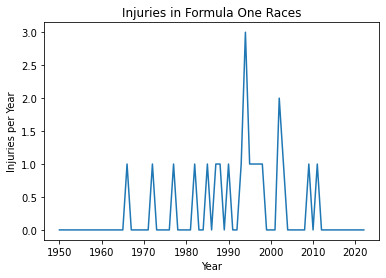

In [16]:
# create plot chart
injury_count_s.plot(x='year', y=['count'], kind='line')

#Add labels and title
plt.xlabel('Year')
plt.ylabel('Injuries per Year')
plt.title('Injuries in Formula One Races');

# save the chart
plt.savefig('injuries_per_year.png')

# OBSERVATIONS

Across the 73 years of Formula One competition, there have been a total of 21 recorded injuries to drivers.

The maximum number of injuries in one season was 3 in 1994. There were two large periods of time where no inuries were recorded, 1950 - 1965 and 2012 to 2022.

This would show that Formula One has had a relatively safe record across the 73 seasons of competition.

This data does not include qualifying or practice sessions nor any test events.
